In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'2022030027 (1).pdf'		  PPS_3.docx
'Assessment - 4.pdf'		  PPS_3.gdoc
'Bird Speciees Dataset'		  provisionalDownload.pdf
 boardingpass_QDYZRJ_DBRBLR.pdf  'PRP 104'
 CODECHEF_PRESENTA.pdf		  Scanned_20230109-1659.pdf
 CODECHEF_PRESENTA.pptx		  ticket_7019222509.pdf
'Colab Notebooks'		 'Untitled document (1).gdoc'
 DSA_Assignment.pdf		 'Untitled document (2).gdoc'
 englablast.pdf			 'Untitled document (3).gdoc'
'Event Registration.gform'	 'Untitled document (4).gdoc'
'Figma files.gdoc'		 'Untitled document (5).gdoc'
 Hi				 'Untitled document (6).gdoc'
 IMG_1455.PNG			 'Untitled document (7).gdoc'
 IMG_8590.HEIC			 'Untitled document (8).gdoc'
 invoice.pdf			 'Untitled document.docx'
 linked_list_stack.gdoc		 'Untitled document.gdoc'
 newww.gdoc			 'Untitled form.gform'
 nnnn.gdoc			  Zaitoon
'PNG image.png'


In [ ]:
!pip install

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

Let's visualize some of the bird images that we will be working on. Also we will observe x and y dimensions of the image.

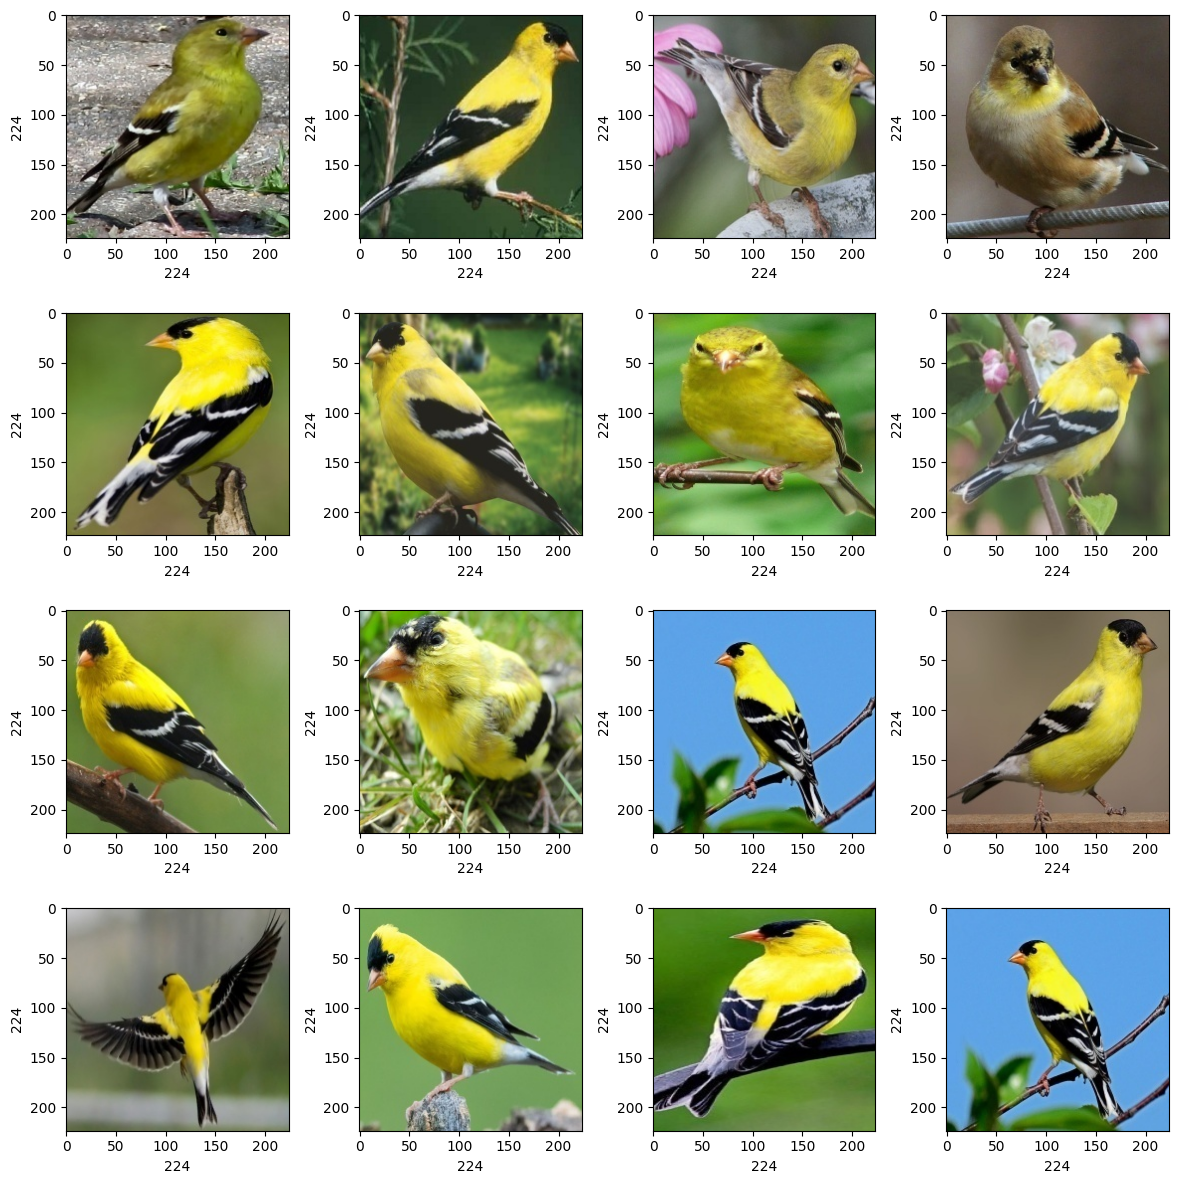

In [ ]:
#plotting 12 images to check the dataset
plt.figure(figsize=(12,12))
path =  "/content/drive/My Drive/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

Setting the root directory for the dataset and storing all the floders name of the dataset. We will also create 2 empty list for image and lables.

In [ ]:
#setting path and creating empty list
dir = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning/Bird Speciees Dataset"
image_list, label_list = [], []

Next we will read all the images and convert it into array and appending the list created above with the image and its label.

#reading and converting the image into numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

Check for class imbalance.

In [ ]:
#visualise the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [ ]:
#Next we will find out the number of classes that we will be working on.
num_classes = len(label_counts)
num_classes

6

In [ ]:
#Checking the size of the single image.
image_list[0].shape

(224, 224, 3)

Checking the shape of image labels which will be equal to the number of images we are going to work with.

In [ ]:
label_list = np.array(label_list)
label_list.shape

(811,)

Now we will split the data into training and testing using train_test_split() of sklearn.

In [ ]:
#Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(image_list, label_list, test_size = 0.2, random_state = 10)

Next we will normalize the images by dividing them with 255. Also, we will reshape x_train and x_test.

In [ ]:
#normalize and reshape the data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 224,224,3)
x_test = x_test.reshape(-1, 224, 224, 3)

Next we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes.

In [ ]:
#label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

[0 1 2 3 4 5]


Now we will split the training data to validation and training data.

In [ ]:
#splitting the training dataset into training and validation data sets
x_train, x_val, y_train,y_val = train_test_split(x_train,y_train, test_size=0.2)

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel). In the last layer we will use softmax as the activation function because it is a multi class classification problem.

In [ ]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

While compiling the model we need to set the type of loss which will be Categorical Crossentropy for our model alongwith this we also need to set the optimizer and the metrics respectively.

In [ ]:
#compiling model
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(0.0005),metrics = ['accuracy'])

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 50 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy but here we can see that the model has already reached a very high accuracy so we don't need to run it for more. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [ ]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
4/4 [==============================] - 15s 4s/step - loss: 1.8204 - accuracy: 0.2077 - val_loss: 1.7131 - val_accuracy: 0.3365
Epoch 2/50
4/4 [==============================] - 13s 3s/step - loss: 1.7247 - accuracy: 0.2705 - val_loss: 1.6452 - val_accuracy: 0.3462
Epoch 3/50
4/4 [==============================] - 16s 4s/step - loss: 1.6441 - accuracy: 0.3575 - val_loss: 1.5778 - val_accuracy: 0.4038
Epoch 4/50
4/4 [==============================] - 19s 5s/step - loss: 1.5783 - accuracy: 0.3623 - val_loss: 1.5131 - val_accuracy: 0.3462
Epoch 5/50
4/4 [==============================] - 13s 3s/step - loss: 1.5124 - accuracy: 0.3382 - val_loss: 1.4355 - val_accuracy: 0.4038
Epoch 6/50
4/4 [==============================] - 13s 3s/step - loss: 1.4869 - accuracy: 0.3720 - val_loss: 1.3820 - val_accuracy: 0.3846
Epoch 7/50
4/4 [==============================] - 12s 3s/step - loss: 1.4101 - accuracy: 0.3913 - val_loss: 1.3046 - val_accuracy: 0.4712
Epoch 8/50
4/4 [==================

Now we will save the model in h5 format to use it later for prediction.

In [ ]:
model.save("/content/drive/My Drive/bird_species.h5")

Next we will plot the accuracy of the model for the training history.

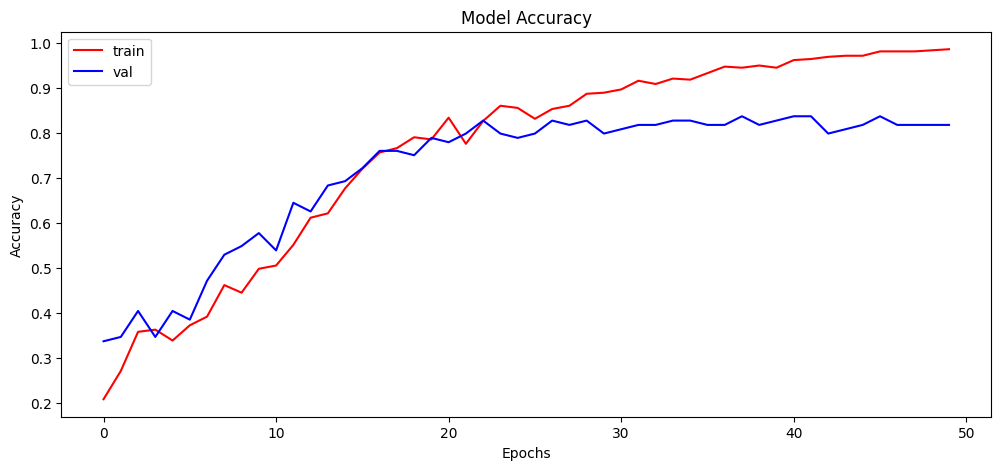

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Here we will plot the loss of the model for the training history.

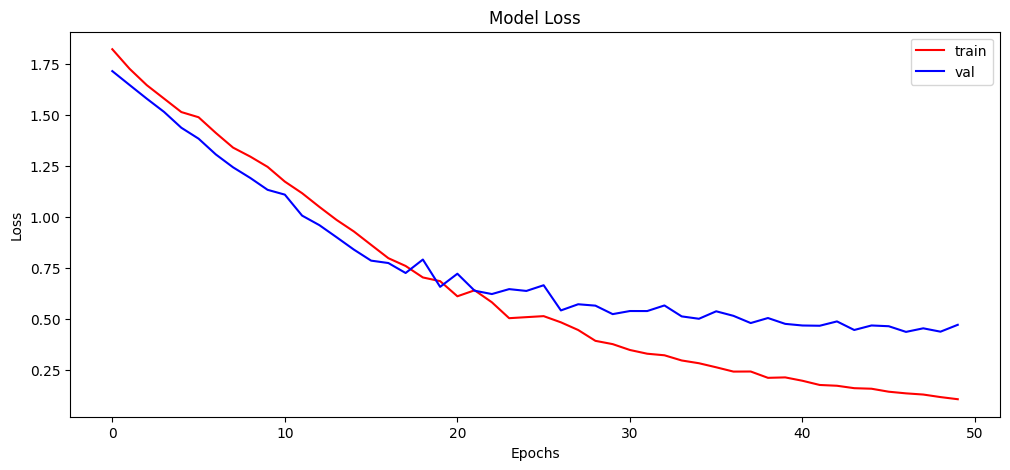

In [ ]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#calculating the test aqccuracy
scores = model.evaluate(x_test,y_test)
print( f"Test accuracy: {scores[1]*100}")

6/6 [==============================] - 3s 390ms/step - loss: 0.7592 - accuracy: 0.7301
Test accuracy: 73.00613522529602


In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 5s 653ms/step


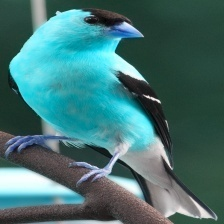

In [ ]:
#plotting image to compare

img = array_to_img(x_test[5])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
# print(labels)
ori_index = labels[np.argmax(y_test[55])]
pred_index = labels[np.argmax(y_pred[4])]
print("Originally : ",labels[np.argmax(y_test[55])])
print("Predicted : ",labels[np.argmax(y_pred[4])])
name1 = ori_index[labels]
name2 = pred_index[labels]
print(name1)
print(name2)

Originally :  1
Predicted :  4


IndexError: ignored